# Car Insurance

### ABOUT THE DATASET
#### This is a dataset from a bank in the United States. Besides usual services, this bank also provides car insurance services. It organizes regular campaigns to attract new clients. The bank has potential customers data, and bank’s employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns(attributes like previous attempts, outcome).

### PROBLEMS TO SOLVE
#### The client want to know the most important factor which determines cold call success so that they can work on it and further improvement on their businesses using the cold call data.The problem I am trying to solve involves creating predictive models and choosing the best model among them using model validation techniques to gain more insights about the key factors which contribute to cold call success and provide recommendation to improve cold call success as well. Further the model implementation can improvement on their businesses and help them on concentarting the key areas to their successes.

In [2]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree

In [3]:
# Reading Csv file
df = pd.read_csv('carInsurance_train.csv',index_col = 'Id')

In [4]:
# Top rows
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [5]:
# Shape of dataframe
df.shape

(4000, 18)

In [6]:
# Columns in dataset
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [7]:
# Statistics of numerical columns
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [8]:
# Datatypes of columns in dataset
df.dtypes

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [9]:
# Statistics of categorical features
df.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,15:48:27,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


### OUTLIER ANALYSIS
#### An Outlier is usually an observation which typically lies farthest from the mean. According to Statistical theory if any observation is 3*IQR(Inter Quartile Range) from the mean then its called an Outlier. Sometimes values are distributed randomly such as a Balance amount - from our boxplot below looks like more values have crossed the whisker. One particular data point is too far when compared to the other points in the data and the outlier is dropped from the dataset.

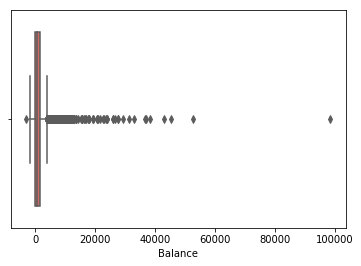

In [10]:
# Plotting Balance field as a Boxplot using Seaborn
sns.boxplot(x='Balance',data=df,palette='hls')

In [11]:
# Maximum value in Balance field
df.Balance.max()

98417

In [12]:
# Looking at the particular maximum value in the dataframe
df[df['Balance'] == 98417]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [13]:
# Dropping the index value corresponding to the outlier
df_new = df.drop(df.index[1742])

### HANDLING MISSING VALUES

#### Missing values are a major concern with data analysis and dealing them is another hurdle. Python treats missing data as NaN but doesnot include it into calcualtions and visulizations. Also predictive models cannot be built without treating missing values. In our case missing values occurs mostly in Outcome and Communication fields. Job and Education have considerable amount of missing values.

### INPUTING MISSING VALUES 
#### The missing values like Job and Education are very few and can imputed using backfill/frontfill pad method in python .Outcome and Communication have quite a lot missing values and hence they are imputed using None for NaN values.

In [14]:
#checking for missing values using isnull() method
df_new.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3041
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [15]:
# Using frontfill to fill the missing values in Job and Education fields
df_new['Job'] = df_new['Job'].fillna(method ='pad')
df_new['Education'] = df_new['Education'].fillna(method ='pad')

In [16]:
# Using none to fill Nan values in Communication and Outcome fields
df_new['Communication'] = df_new['Communication'].fillna('none')
df_new['Outcome'] = df_new['Outcome'].fillna('none')

In [17]:
#Looks like all missing values have been imputed
df_new.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

### CORRELATION
#### Correlation is used to determine the relationship between two variables/ fields. Correlation varies from -1 to 1; if the Correlation is 1 then the fields are positively correlated, 0 having no correlation and -1 is negatively correlated. Lets see how each atttribute correlates with one another using Heatmap. Looks like there is not much of a correlation among variables but DaysPassed and PrevAttempts have a positive Correlation with each other.

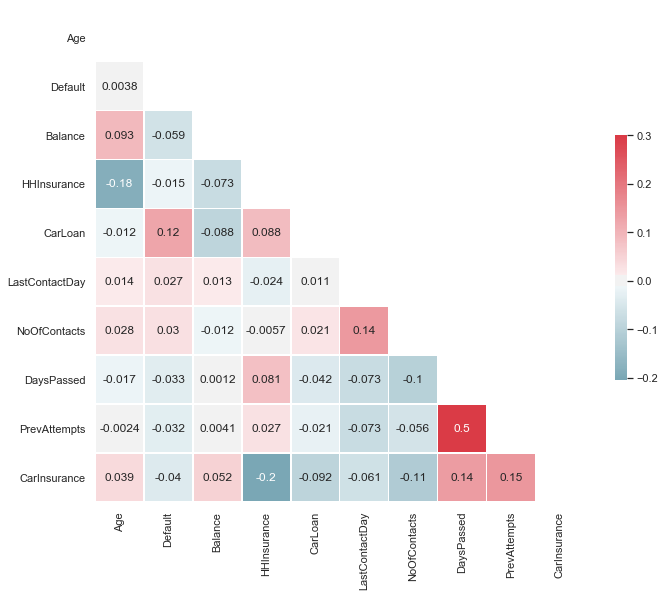

In [18]:
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
sns.set(style="white")
corr = df_new.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### DATA VISUALIZATION
#### Visualization is an important aspect of Data Science without which its pretty diffcult to arrive at an outcome easily. Eventhough the result is determined in tables there is a painpoint in looking at each values and coming to a conclusion. Charts/Graphs are much helpful to accomplish those tasks with ease even to a non-technical person. Executives and managers love to look at a report with visualization so that they can easily come up with complex decisions.Below is a pairplot which pairs fields of interest and plots them. The variables for the Pairplot are selected from the heatmap which have an impact on the outcome

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


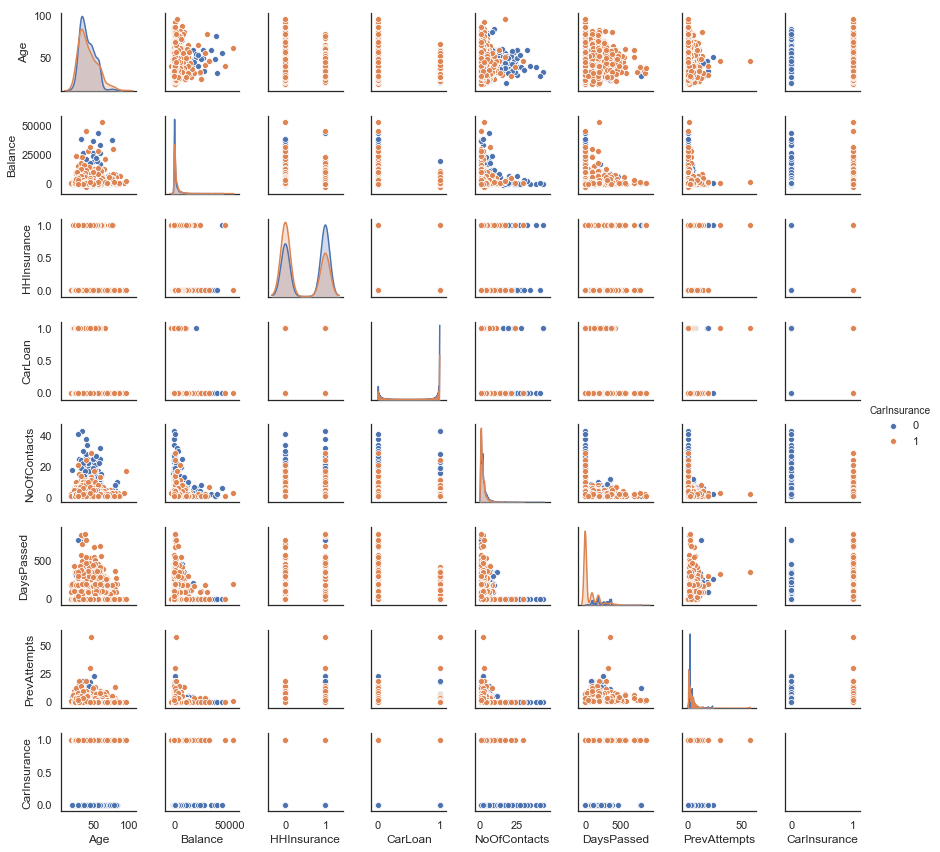

In [19]:
# Plotting paired fields of intrest using Seaborn pairplot
df_sub = ['Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts','CarInsurance']
sns.pairplot(df_new[df_sub],hue='CarInsurance',size=1.5)

##### -Older people are more likely to Buy Car Insurance.                                                                     
##### -People having prior Car Insurance and Home Insurance are less likely to purchase.                                     
##### -People give a positive sign if the days passed (time before they were contacted) increases.                           
##### -When you contact persons frequently their buying tendency increases after 20+ contacts.                               
##### -No.of contacts and PrevAttempts work the same , more the better i.e increases Car Insurance purchase.

### PairGrid 
#### helps us to view relationships between CarInsurance,Balance and Categorical variables such as Education,Marital Status and Job.Students and Retired people have purchased the most Car Insurances with Former leading the Latter People with single status and who are highly educated dominate the charts.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


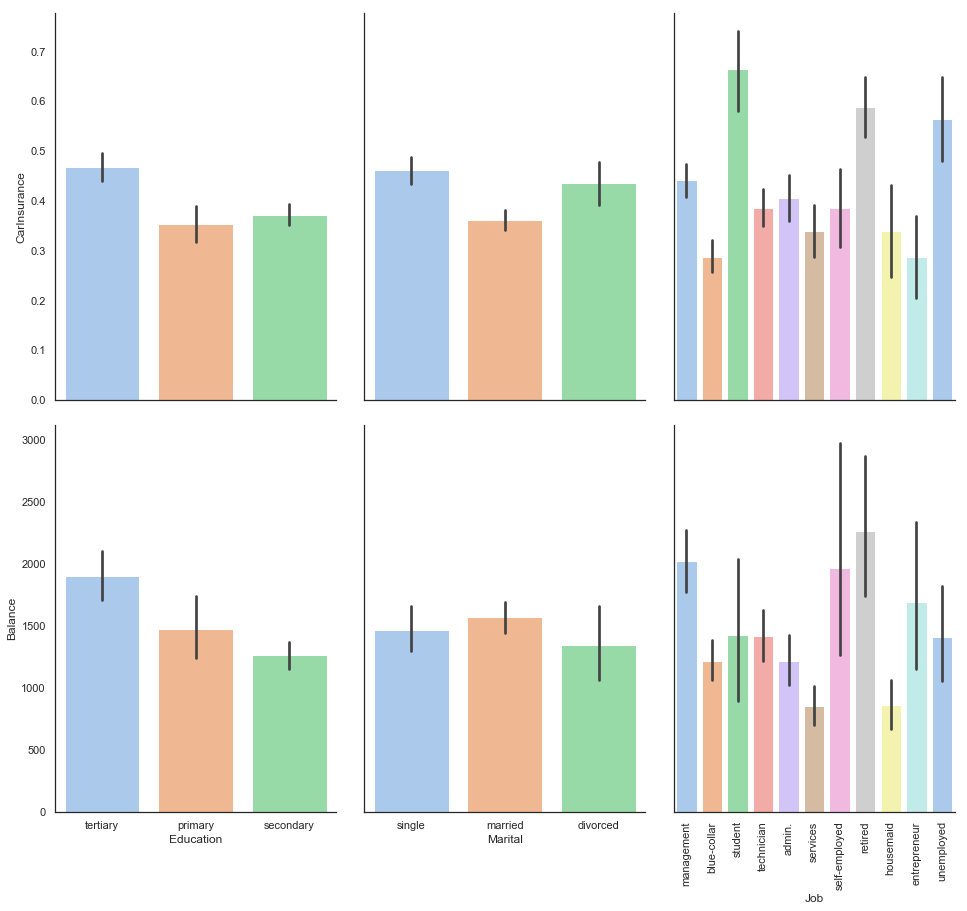

In [20]:
#Uses multiple x and y variables to form pair grid of categorical values passed
g = sns.PairGrid(df_new,
                 x_vars=["Education","Marital", "Job"],
                 y_vars=["CarInsurance", "Balance"],
                 aspect=.75, size=6)
plt.xticks(rotation=90)
g.map(sns.barplot, palette="pastel")

### LOOKS INTERESTING
#### Violin plot has bulges near value 1 in y axis shows that Mar, Sep, Oct and Dec are the desired months for people buying Car Insurance.The Count plot below has more missing previous campaign outcome where majority said **No** to car insurance.

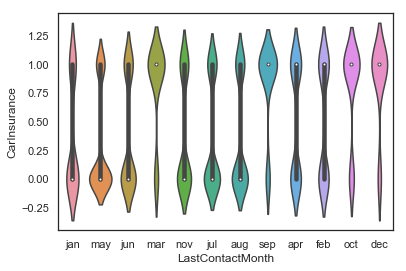

In [21]:
#Seaborn violin plot for LastContactMonth and CarInsurance fields
sns.violinplot(x="LastContactMonth",y='CarInsurance',data=df_new)

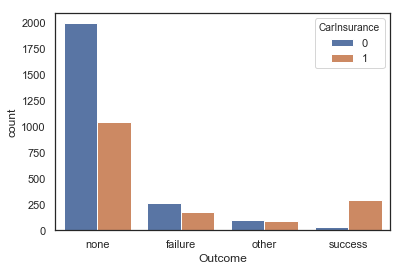

In [22]:
#Count of CarInsurance against Outcome i.e previous campaign outcome
sns.countplot(x="Outcome",hue='CarInsurance',data=df_new)

### FEATURE ENGINEERING/ FEATURE EXTRACTION
#### Feature Engineering is an essential element to a Machine Learning Problem. Picking a feature from a set of attribute determines how well the algorithm will work in making predictions, so this part is a crucial one. In our problem there are a list of continuous variables like Age and Balance and they need to be binned. Data binning (also called Discrete binning or bucketing) is a data pre-processing technique used to reduce the effects of minor observation errors. Statistical data binning is a way to group a number of more or less continuous values into a smaller number of "bins". The Age and Balance continuous variables are bucketed using quartile cut function into 5 segments.

In [23]:
#Qcut splits both the attribute into 5 buckets
df_new['AgeBinned'] = pd.qcut(df_new['Age'], 5 , labels = False)
df_new['BalanceBinned'] = pd.qcut(df_new['Balance'], 5,labels = False)

#### There seems to be a unique problem with respect to the CallStart and CallEnd attributes and are recorded as object variables which can be computed easily using the datetime function, so converting it to datetime function and subtracting them arrives at the actual CallTime which can be further binned as above.

In [24]:
#Converting CallStart and CallEnd to datetime datatype
df_new['CallStart'] = pd.to_datetime(df_new['CallStart'] )
df_new['CallEnd'] = pd.to_datetime(df_new['CallEnd'] )
#Subtracting both the Start and End times to arrive at the actual CallTime
df_new['CallTime'] = (df_new['CallEnd'] - df_new['CallStart']).dt.total_seconds()
#Binning the CallTime
df_new['CallTimeBinned'] = pd.qcut(df_new['CallTime'], 5,labels = False)

In [25]:
#Dropping the original columns of the binned, just to make things easy
df_new.drop(['Age','Balance','CallStart','CallEnd','CallTime'],axis = 1,inplace = True)

### Categorical variables can also paricipate in model building provided that they get their dummy values inorder to be included. Well, we would have more columns included to our dataframe by this procedure.

In [26]:
# Using get_dummies function to assign binary values to each value in the categorical column
Job = pd.get_dummies(data = df_new['Job'],prefix = "Job")
Marital= pd.get_dummies(data = df_new['Marital'],prefix = "Marital")
Education= pd.get_dummies(data = df_new['Education'],prefix="Education")
Communication = pd.get_dummies(data = df_new['Communication'],prefix = "Communication")
LastContactMonth = pd.get_dummies(data = df_new['LastContactMonth'],prefix= "LastContactMonth")
Outcome = pd.get_dummies(data = df_new['Outcome'],prefix = "Outcome")

In [27]:
# Dropping the categorical columns which have been assigned dummies
df_new.drop(['Job','Marital','Education','Communication','LastContactMonth','Outcome'],axis=1,inplace=True)

In [28]:
#Concatenating the dataframe with the categorical dummy columns
df = pd.concat([df_new,Job,Marital,Education,Communication,LastContactMonth,Outcome],axis=1)

In [29]:
# The dataframe has some new additions resulting from the categorical dummies added
df.columns

Index(['Default', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts',
       'DaysPassed', 'PrevAttempts', 'CarInsurance', 'AgeBinned',
       'BalanceBinned', 'CallTimeBinned', 'Job_admin.', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Marital_divorced', 'Marital_married',
       'Marital_single', 'Education_primary', 'Education_secondary',
       'Education_tertiary', 'Communication_cellular', 'Communication_none',
       'Communication_telephone', 'LastContactMonth_apr',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Outcome_failure',
       'Outcome_none', 'Outcome_other', 'Outcome

### TEST TRAIN SPLIT

#### The Train Test Split is usually done to evaluate our model by Training it on the known output(labeled data) so that the model can learn on it and Testing using unlabeled data so that the predictive accuracy of the model can be determined.

In [30]:
# Dropping the Target for X
X= df.drop(['CarInsurance'],axis=1).values
# Including only the Target for y
y=df['CarInsurance'].values
#Splitting the Training and Testing data having 20% of Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

### PREDICTIVE MODELS

#### Predictive Models are built to correctly classify the unknown label inputs, the models are trained using the labeled outputs so that it can learn from them and correctly classify the non labeled items. There are a lot of Classification Predictor Algorithms incorporated into sklearn and in our case we have utilized most of the classification algorithms related to our problem. Our Classifiers include

##### kNN
##### Logistic Regression
##### SVM
##### Decision Tree
##### Random Forest

### CROSS VALIDATION

#### Cross-validation is used to split the data into training and test sets to evaluate how the model performs. In KFold, K determins the number of partitions to be made on the data and from which 1 sample is used for training and 10-1 in our case 9 is used for the validation purposes. Each model's cross validation score is obtained by evaluating the model by splitting it into 10 Folds.

### MODEL VALIDATION

#### Validating our models built is a key component which helps in determining how our model's predictive power. Starting from the most common accuracy score, cross validation score to classification report(precision, recall, f1-score,support), ROC curves and Confusion matrix , the models have gone through extensive validation to choose the best predictor.

### BEST MODEL

#### The best model is Random Forest doing their part well with good accuracy scores, less false positives and true negatives.

In [31]:
#The code for the below matrix is taken from sklearn documentation
#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Success and Failure for 0 and 1    
class_names = ['Success','Failure']

kNN Accuracy is 0.76
Cross Validation Score = 0.75
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       479
           1       0.78      0.55      0.65       321

   micro avg       0.76      0.76      0.76       800
   macro avg       0.76      0.72      0.73       800
weighted avg       0.76      0.76      0.75       800



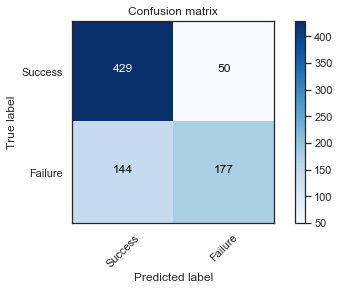

In [32]:
# Defining the kNNClassifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)
#Fitting the classifier to the training set
knn.fit(X_train,y_train)
print ("kNN Accuracy is %2.2f" % accuracy_score(y_test, knn.predict(X_test)))
#The cross validation score is obtained for kNN using 10 folds
score_knn = cross_val_score(knn, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_knn)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))
#Defining the confusion matrix
cm = confusion_matrix(y_test,y_pred)
#Plotting the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logistic Accuracy is 0.83


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       479
           1       0.80      0.78      0.79       321

   micro avg       0.83      0.83      0.83       800
   macro avg       0.83      0.82      0.82       800
weighted avg       0.83      0.83      0.83       800



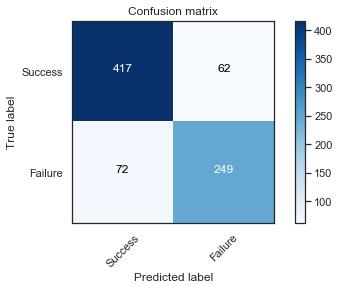

In [33]:
#Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Accuracy is 0.81


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       479
           1       0.75      0.76      0.76       321

   micro avg       0.81      0.81      0.81       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.81      0.81      0.81       800



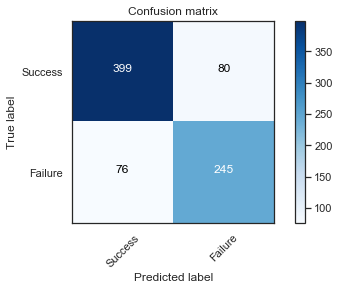

In [34]:
#SVM Classifier
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(X_test)))
score_svm = cross_val_score(SVM, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_svm)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Decision Tree Accuracy is 0.82
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       479
           1       0.74      0.83      0.79       321

   micro avg       0.82      0.82      0.82       800
   macro avg       0.81      0.82      0.81       800
weighted avg       0.82      0.82      0.82       800



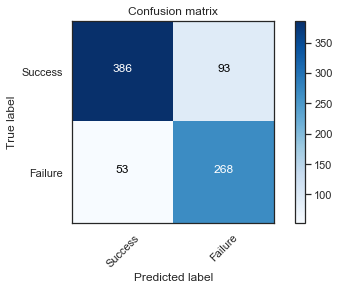

In [35]:
# Decision Tree Classifier
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Random Forest Accuracy is 0.85
Cross Validation Score = 0.84
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       479
           1       0.79      0.85      0.82       321

   micro avg       0.85      0.85      0.85       800
   macro avg       0.84      0.85      0.84       800
weighted avg       0.85      0.85      0.85       800



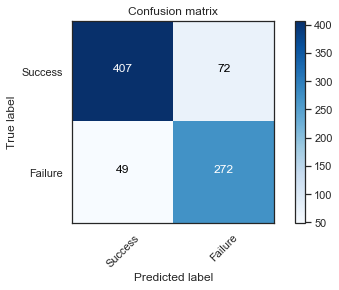

In [36]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

### FEATURE IMPORTANCES

#### Knowing which feature has a major part in determining the output can be very useful and help in working on them to increase the output of the solution. Finding the important features can be very handy when making important decisions and conclusions. The Important feature identification is done by using models such as Logistic Regression and Using ExtraTreesClassifier model function.

In [37]:
# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = LogisticRegression()
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train,y_train)
# Displays the feature rank
rfe.ranking_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([13, 12, 16, 41, 37, 42, 35, 39, 36,  3, 22, 15, 17, 26, 31, 18, 20,
       32,  2, 34, 25, 27, 19, 28, 24, 23, 33, 30,  1, 29, 38,  7, 14, 40,
        4,  5, 21,  1,  6,  8,  1,  1, 10,  9, 11,  1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00265283 0.03054151 0.01556235 0.06689425 0.0492703  0.01547911
 0.01377616 0.04537479 0.05363804 0.2416559  0.01326406 0.01142849
 0.00514909 0.00490307 0.0129827  0.00955852 0.00682377 0.00915731
 0.00681878 0.01565999 0.00697497 0.00950549 0.01361442 0.01121526
 0.01025227 0.01697457 0.01487727 0.0204117  0.02156603 0.00718193
 0.01916438 0.01507321 0.00432166 0.01035761 0.00858128 0.01287616
 0.0160749  0.01061387 0.01442658 0.01024748 0.00993967 0.01274892
 0.00924919 0.02274888 0.00582721 0.05458404]


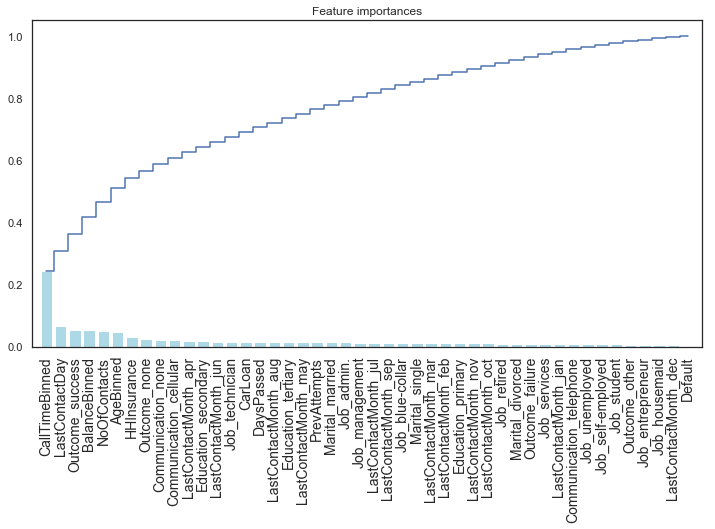

In [38]:
# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = df.drop(['CarInsurance'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### The major problem we tried to address is cold call success and below are some key result interpretations. Cold Call Success is tied with the CallTime, when the representative engages with the customer and creates a rapport with them then most people say yes to the CarInsurance. LastContactDay also plays a crucial part in determining the Cold Call Success (i.e) following up with a customer after a Cold Call. Their account balance can be more of a sign since people having more balance have opted for the CarInsurance.

#### No of Contacts, how many times the person has been contacted also determines the cold call success. More times the better, which closely related to following up on a continuous basis. Previous campaign outcome success is also a major factor. Older People have more tendency to buy Car Insurance than younger people so that major importance can be given to the older age groups.The Best Model predicts whether the Cold Call will be a Success or not and hence by working on the above mentioned points and trying to improve the important features like CallTime and following up can improve the results to a farer extent.